<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/Inf_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Leer datos--------------------------------
DATA=pd.read_csv("data.txt", delim_whitespace=True)
print(DATA)
#------------------------------------

     obs  eruptions  waiting
0      1      3.600       79
1      2      1.800       54
2      3      3.333       74
3      4      2.283       62
4      5      4.533       85
..   ...        ...      ...
267  268      4.117       81
268  269      2.150       46
269  270      4.417       90
270  271      1.817       46
271  272      4.467       74

[272 rows x 3 columns]


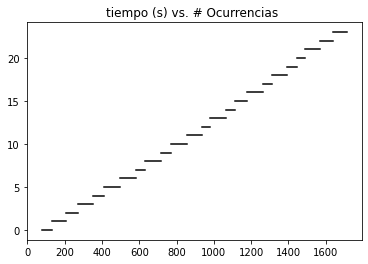

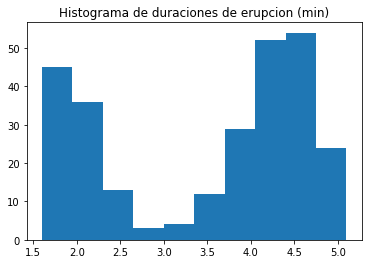

In [25]:
#Exploracion------------------------------------
Tiempos_acum=np.cumsum(DATA["waiting"][0:25])#En minutos.
Duraciones=DATA["eruptions"]#En segundos.
#plt.step(Tiempos_acum,np.arange(0,len(Tiempos_acum)),)
for i in range(0,len(Tiempos_acum)-1):
    plt.plot([Tiempos_acum[i],Tiempos_acum[i+1]],[i,i],"-k")
plt.title("tiempo (s) vs. # Ocurrencias ")
plt.show()
plt.hist(Duraciones)
plt.title("Histograma de duraciones de erupcion (min)")
plt.show()
#------------------------------------

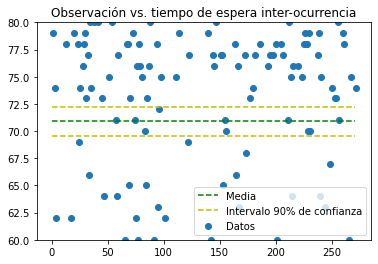

In [54]:
Tiempos_espera=DATA["waiting"]
media=np.mean(Tiempos_espera)
sd=np.std(Tiempos_espera)
from scipy.stats import norm
z_alpha=norm.ppf(.95)
plt.title("Observación vs. tiempo de espera inter-ocurrencia")
plt.plot(np.arange(0,len(Tiempos_espera)),np.repeat(media,len(Tiempos_espera)),'g--',label='Media')
plt.scatter(np.arange(1,len(Tiempos_espera)+1),Tiempos_espera,label='Datos')
plt.plot(np.arange(0,len(Tiempos_espera)),np.repeat(media+z_alpha*sd/np.sqrt(len(Tiempos_espera)),len(Tiempos_espera)),'y--')
plt.plot(np.arange(0,len(Tiempos_espera)),np.repeat(media-z_alpha*sd/np.sqrt(len(Tiempos_espera)),len(Tiempos_espera)),'y--',label='Intervalo 90% de confianza')
plt.axis(ymin=60,ymax=80)
plt.legend()
plt.show()

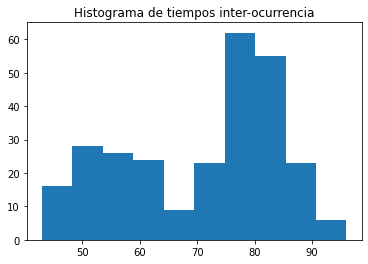

In [38]:
plt.hist(Tiempos_espera)
plt.title("Histograma de tiempos inter-ocurrencia")
plt.show()
from scipy import stats

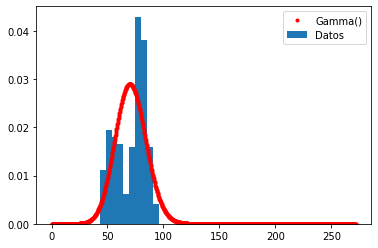

Parámetro de ajuste: alpha= 263.1300698891873 
   


In [39]:
#Ajuste de una gamma.
l=stats.distributions.gamma.fit(Tiempos_espera);
plt.hist(Tiempos_espera,density=True)
x = np.linspace(0,len(Duraciones),num=1000);
fitted_data = stats.distributions.gamma.pdf(x, l[0],l[1],l[2]);
plt.plot(x,fitted_data,'r.')
plt.legend(['Gamma()','Datos'])
plt.show()
print("Parámetro de ajuste: alpha=",l[0],"\n   ")